# Supervised Learning → Random Forest (Classification)

This notebook is part of the **ML-Methods** project.

As with the other classification notebooks,
the first sections focus on data preparation
and are intentionally repeated.

This ensures consistency across models
and allows fair comparison of results.

1. Project setup and common pipeline
2. Dataset loading
3. Train-test split
4. Feature scaling (why we do it)

----------------------------------

5. What is this model? (Intuition)
6. Model training
7. Model behavior and key parameters
8. Predictions
9. Model evaluation
10. When to use it and when not to
11. Model persistence
12. Mathematical formulation (deep dive)
13. Final summary – Code only

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

The goal is not just to run the code,
but to understand what is happening at each step
and be able to adapt it to your own data.

-----------------------------------------------------

## What is Random Forest Classification?

Random Forest Classification is an **ensemble classification model**
that combines the predictions of many decision trees.

Instead of relying on a single classifier,
Random Forest aggregates the decisions
of multiple independent models
to produce a final prediction.

-----------------------------------------------------

## Why we start with intuition

Random Forest may look complex,
but its core idea is simple.

Each decision tree makes a prediction.
Some trees make mistakes,
but many trees together tend to agree
on the correct class.

Understanding this idea of
**many weak classifiers working together**
is key to understanding Random Forest.

-----------------------------------------------------

## What you should expect from the results

With Random Forest Classification, you should expect:
- strong performance on non-linear problems
- robustness to noise and outliers
- stable predictions without heavy tuning

However:
- interpretability is lower than linear models
- training and memory usage are higher



_________________________________________________

## 1. Project setup and common pipeline

In this section we set up the common pipeline
used across classification models in this project.

Although Random Forest does not require feature scaling,
we keep scaling for pipeline consistency
and fair model comparison.

In [1]:
# Common imports used across all classification models

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


# ____________________________________
## 2. Dataset loading

In this section we load the dataset
used for the Random Forest classification task.

We use the same dataset as in the other classification models
to allow a fair and direct comparison.


In [2]:
# Load the dataset

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


### Inputs and target

- `X` contains the input features
- `y` contains the target labels

This is a binary classification problem,
where each sample belongs to one of two classes.


### Why using the same dataset matters

Using the same dataset across classification models
allows us to:
- isolate the effect of the model choice
- compare performance objectively
- better understand model-specific behavior


# ____________________________________
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This step allows us to evaluate
how well the Random Forest classifier generalizes
to unseen data.


In [3]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### Why this step is important

A classification model must be evaluated
on data it has never seen during training.

By separating the data:
- the training set is used to build the model
- the test set is used only for evaluation

This prevents overly optimistic results
and reflects real-world performance.


### Note on split proportions

The choice of train-test split
depends on the dataset and the problem context.

Common splits include:
- 80 / 20
- 70 / 30
- 90 / 10

In this notebook, we use an 80 / 20 split
as a reasonable default.


# ____________________________________
## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input features.

Random Forest does **not require** feature scaling
to function correctly.


### Why scaling is not required for Random Forest

Random Forest is based on decision trees.

Decision trees:
- split data using feature thresholds
- are invariant to feature scale
- depend on feature order, not magnitude

For this reason, scaling does not change
how Random Forest builds its trees.


### Why we still apply scaling

Even though scaling is not required,
we keep it in the pipeline to:

- maintain consistency across classification models
- allow fair model comparison
- reuse the same preprocessing steps
- avoid conditional logic in the code

This makes the overall project
simpler and more maintainable.


### Important rule: fit only on training data

As with all preprocessing steps:
- the scaler is fitted only on the training data
- the same scaler is applied to test data

This prevents data leakage
and ensures fair evaluation.


In [4]:
# Feature scaling (kept for pipeline consistency)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### What we have after this step

- scaled training data
- scaled test data
- a consistent preprocessing pipeline

At this point, the data is ready
to be used by the Random Forest classifier.


# ____________________________________
## 5. What is this model? (Random Forest Classification)

Before training the model, it is important to understand
what Random Forest Classification does conceptually.

Random Forest Classification is an **ensemble classifier**
that combines the decisions of many decision trees
to assign a final class label.


### The core idea

Instead of relying on a single decision tree,
Random Forest builds **many trees**.

Each tree:
- sees a slightly different version of the data
- makes its own classification decision

The final prediction is obtained by:
- collecting the predictions of all trees
- selecting the class with the majority of votes


### Why many trees work better than one

Individual decision trees:
- are easy to understand
- but tend to overfit the training data

Random Forest reduces overfitting by:
- training trees on different subsets of data
- introducing randomness in feature selection
- aggregating many independent decisions

Errors made by individual trees
tend to cancel out when combined.


### How this differs from other classifiers

Compared to Logistic Regression:
- Random Forest captures non-linear relationships
- it does not assume a linear decision boundary

Compared to KNN:
- Random Forest learns a model during training
- prediction does not require storing all training samples


### Strengths and weaknesses

Strengths:
- strong performance on complex data
- robustness to noise and outliers
- minimal preprocessing requirements

Weaknesses:
- reduced interpretability
- higher computational cost
- larger memory footprint


### Key takeaway

Random Forest Classification answers the question:
"What do many different decision trees predict?"

By combining these predictions,
it produces robust and accurate classifications
on a wide range of problems.


# ____________________________________
## 6. Model training (Random Forest Classification)

In this section we train the Random Forest classifier
using the prepared training data.

Unlike KNN, Random Forest performs real training:
it builds multiple decision trees
and learns patterns from the data.


### What does "training" mean for Random Forest?

Training a Random Forest classifier means:

- building many decision trees
- each tree is trained on a random subset of the training data
- each split considers only a random subset of features

This controlled randomness helps:
- reduce overfitting
- improve generalization
- increase robustness


### Important hyperparameters (introduced, not tuned)

At this stage, we focus on understanding the model,
not on optimizing its performance.

We start with a simple and commonly used configuration.
Hyperparameter tuning can be explored later.


In [5]:
# Initialize the Random Forest classifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### What these parameters mean

- `n_estimators=100`  
  Number of decision trees in the forest.  
  More trees usually improve stability, but increase computation.

- `random_state=42`  
  Ensures reproducibility of results.

- `n_jobs=-1`  
  Uses all available CPU cores to speed up training.


### What we have after training

After this step:
- multiple decision trees have been trained
- each tree has learned different decision rules
- the forest is ready to make predictions

Training is computationally heavier than KNN,
but prediction is faster on large datasets.


# ____________________________________
## 7. Model behavior and key parameters (Random Forest Classification)

In this section we analyze how Random Forest Classification behaves
and which parameters most strongly influence its predictions.

Random Forest does not produce simple, interpretable coefficients,
but its behavior can still be understood at a high level.


### Number of trees (`n_estimators`)

The number of trees controls:
- model stability
- variance reduction

General behavior:
- few trees → higher variance
- many trees → more stable predictions

Beyond a certain point,
adding more trees provides diminishing returns.


### Tree depth and complexity

Each decision tree can grow deep and complex.

Key parameters that control tree complexity include:
- maximum tree depth
- minimum samples per split
- minimum samples per leaf

Deeper trees:
- capture fine details
- risk overfitting

Shallower trees:
- generalize better
- may underfit


### Feature randomness

At each split, Random Forest considers
only a random subset of features.

This randomness:
- decorrelates trees
- reduces overfitting
- improves ensemble performance

It is one of the main reasons
Random Forest performs well in practice.


### Voting mechanism

For classification:
- each tree outputs a class prediction
- the final class is chosen by majority vote

This voting process:
- smooths individual tree errors
- improves prediction robustness


### Key takeaway

Random Forest Classification behavior is driven by:
- how many trees are used
- how complex each tree is
- how much randomness is introduced

Understanding these elements helps explain
why Random Forest often performs strongly
without heavy tuning.


# ____________________________________
## 8. Predictions (Random Forest Classification)

In this section we use the trained Random Forest classifier
to generate predictions on unseen test data.

As with other classification models,
it is important to distinguish between:
- predicted class labels
- predicted class probabilities


### Predicting class labels

The `predict` method returns the final class prediction
for each sample in the test set.

For Random Forest:
- each decision tree predicts a class
- the final class is chosen by majority voting


In [7]:
# Predict class labels on the test set

y_pred = rf_model.predict(X_test_scaled)

print(y_pred)


[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


### Predicting class probabilities

The `predict_proba` method returns class probabilities.

For Random Forest:
- each tree votes for a class
- probabilities represent the fraction of trees
  predicting each class


In [8]:
# Predict class probabilities on the test set

y_pred_proba = rf_model.predict_proba(X_test_scaled)

pd.DataFrame(
    y_pred_proba[:10],
    columns=["P(class 0)", "P(class 1)"]
)

,P(class 0),P(class 1)
0,0.03,0.97
1,1.00,0.00
2,1.00,0.00
3,0.01,0.99
4,0.00,1.00
5,1.00,0.00
6,1.00,0.00
7,0.84,0.16
8,0.65,0.35
9,0.06,0.94


### Interpreting Random Forest probabilities

Random Forest probabilities:
- reflect consensus among trees
- are generally more stable than KNN probabilities
- are less directly interpretable than Logistic Regression

High probability means:
- many trees agree on the prediction


### What you should expect to observe

With Random Forest Classification, you should expect:
- confident predictions for clear cases
- smoother probability estimates than KNN
- strong performance on complex, non-linear data

These predictions will be evaluated
in the next section using classification metrics.


# ____________________________________
## 9. Model evaluation (Random Forest Classification)

In this section we evaluate the performance of the Random Forest classifier
on unseen test data.

For classification models, evaluation requires
analyzing both overall performance
and the types of errors the model makes.


### Accuracy

Accuracy measures the proportion of correctly classified samples.

It provides a high-level overview of model performance,
but it does not capture the full error structure.


In [9]:
# Compute accuracy

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9649122807017544

### Confusion matrix

The confusion matrix compares predicted labels
with true labels.

It allows us to identify:
- correct classifications
- false positives
- false negatives


In [10]:
# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[40,  3],
       [ 1, 70]])

### Confusion matrix visualization

A visual representation of the confusion matrix
makes patterns of errors easier to interpret.


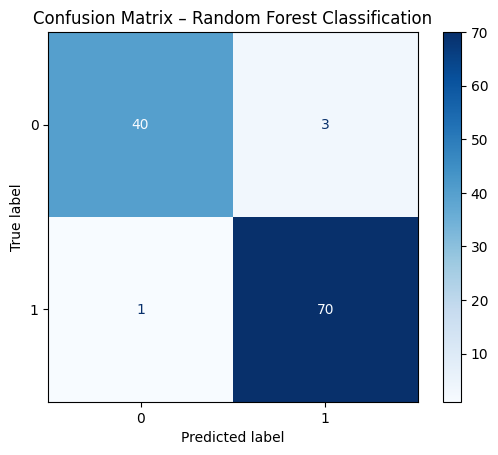

In [11]:
# Visualize confusion matrix

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rf_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest Classification")
plt.show()


### Classification report

The classification report summarizes performance
for each class using:

- Precision
- Recall
- F1-score

These metrics help evaluate trade-offs
between different types of errors.


In [12]:
# Classification report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### About the confusion matrix

In this notebook, we focus on interpreting the results
produced by the confusion matrix.

For a deeper explanation of:
- how each cell should be read
- how metrics are derived
- practical examples

please refer to the dedicated **Confusion Matrix**
page in the general concepts section of this project.


### Key takeaway

Random Forest Classification evaluation typically shows:
- strong overall accuracy
- balanced precision and recall
- robustness to noise and outliers

The confusion matrix remains the most informative tool
to understand classification behavior.


# ____________________________________
## 10. When to use it and when not to (Random Forest Classification)

Random Forest Classification is a powerful and versatile model,
but it is not always the best choice.

Knowing when to use it
helps balance performance, interpretability, and efficiency.


### When Random Forest Classification is a good choice

Random Forest works well when:

- The relationship between features and classes is non-linear
- The dataset contains complex interactions between features
- Robustness to noise and outliers is important
- You want strong performance with minimal tuning
- Interpretability at the feature level is not critical

It is often used as:
- a strong default classifier
- a benchmark for more advanced models
- a production-ready model for tabular data


### When Random Forest Classification is NOT a good choice

Random Forest may not be ideal when:

- Model interpretability is a top priority
- The dataset is extremely large and memory is limited
- Very fast training or inference is required
- The problem is simple and linear models already perform well


### Typical warning signs

You should be cautious if:

- The model overfits despite many trees
- Training time becomes excessive
- Feature importance is difficult to interpret meaningfully
- A simpler model achieves similar performance

These signs suggest that Random Forest
may be unnecessarily complex for the task.


### Key takeaway

Random Forest Classification offers an excellent balance
between performance and robustness.

It is often one of the best first choices
for complex tabular classification problems,
but its power comes at the cost of interpretability
and computational efficiency.


# ____________________________________
## 11. Model persistence (Random Forest Classification)

In this section we save the trained Random Forest classifier
and the preprocessing steps used during training.

Saving the model allows us to reuse it later
without retraining and ensures reproducibility.


### Why saving the model is important

Once a model has been trained and evaluated,
it is common practice to save it.

This allows the model to be:
- reused in other notebooks
- integrated into applications
- deployed in production systems

Model persistence separates
training from inference.


### Should we save the scaler for Random Forest?

Random Forest does not depend on feature scaling.

However, in this project:
- scaling is part of the common pipeline
- all models share the same preprocessing steps

For this reason, we save the scaler together with the model
to ensure full pipeline reproducibility.


In [ ]:
from pathlib import Path
import joblib

# Define model directory
model_dir = Path("models/supervised_learning/classification/random_forest")

# Create directory if it does not exist
model_dir.mkdir(parents=True, exist_ok=True)

# Save model and scaler
joblib.dump(rf_model, model_dir / "random_forest_model.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")


### What we have now

- A trained Random Forest classification model
- A fitted feature scaler
- Both saved and ready to be reused

The model can now be:
- loaded without retraining
- applied to new data
- compared with other classification models


### Loading the model later (conceptual example)

To reuse the model:
- load the scaler
- apply it to new input data
- load the Random Forest model
- generate predictions

This guarantees consistency
with the original training pipeline.


# ____________________________________
## 12. Mathematical formulation (deep dive)

This section provides a mathematical and algorithmic view
of Random Forest Classification.

The goal is to understand how the model works internally,
without going into low-level implementation details.


### Representation of the data

Random Forest Classification is trained on a labeled dataset:

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
$$

where:
- $x_i \in \mathbb{R}^d$ is a feature vector
- $y_i \in \{0, 1\}$ is the class label

The model learns a collection of decision trees
from this dataset.


### Bootstrap sampling (bagging)

Each decision tree in the forest
is trained on a **bootstrap sample** of the training data.

A bootstrap sample is created by:
- randomly sampling $n$ points
- with replacement
- from the original training set

This introduces diversity among trees
and reduces overfitting.


### Decision tree splits

Each decision tree recursively splits the feature space.

At each node, a feature $j$ and a threshold $t$ are selected
to maximize a purity criterion, such as:

- Gini impurity
- or entropy

The goal is to partition the data
into more homogeneous subsets.


### Random feature selection

At each split, Random Forest considers
only a random subset of features.

This means that:
- not all features compete at every split
- trees become less correlated
- ensemble performance improves

This randomness is a key component
of the Random Forest algorithm.


### Tree-level prediction

Each individual decision tree $T_k$
produces a class prediction:

$$
\hat{y}^{(k)} \in \{0, 1\}
$$

This prediction is based on
the path followed by the input sample
from the root to a leaf node.


### Ensemble voting

The final prediction of the Random Forest
is obtained by majority voting:

$$
\hat{y} = \text{mode}(\hat{y}^{(1)}, \hat{y}^{(2)}, \dots, \hat{y}^{(K)})
$$

where $K$ is the number of trees in the forest.


### Probabilistic interpretation

Random Forest can also output class probabilities.

The probability of a class is computed as:

$$
P(y = c \mid x) =
\frac{1}{K} \sum_{k=1}^{K} \mathbb{1}
\bigl(\hat{y}^{(k)} = c\bigr)
$$

This represents the fraction of trees
predicting class $c$.


### Bias–variance perspective

Random Forest reduces variance by:
- averaging many high-variance decision trees
- introducing randomness in data and features

This leads to:
- lower variance than a single tree
- strong generalization performance
- stable predictions across datasets


### Final takeaway

Random Forest Classification combines:
- decision trees
- bootstrap sampling
- random feature selection
- ensemble voting

This results in a powerful, non-linear classifier
that performs well on a wide range of problems,
at the cost of reduced interpretability.


# ____________________________________
## 13. Final summary – Code only

The following cell contains the complete classification pipeline
from data loading to model persistence.

No explanations are provided here on purpose.

This section is intended for:
- quick execution
- reference
- reuse in scripts or applications

If you want to understand what each step does and why,
read the notebook from top to bottom.


In [ ]:
# ====================================
# Imports
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# ====================================
# Feature scaling (kept for consistency)
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ====================================
# Model initialization
# ====================================

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


# ====================================
# Model training
# ====================================

rf_model.fit(X_train_scaled, y_train)


# ====================================
# Predictions
# ====================================

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)


# ====================================
# Model evaluation
# ====================================

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy
cm

print(classification_report(y_test, y_pred))


# ====================================
# Confusion matrix visualization
# ====================================

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rf_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest Classification")
plt.show()


# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/classification/random_forest")
model_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(rf_model, model_dir / "random_forest_model.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")
